# Colombia - COVID 19 Analysis

## Introduction

This notebook emphazises on giving some insights on the virus spread in Colombia.

### Data and Set up

Import numpy and pandas

In [1]:
import pandas as pd
import numpy as np

Import visualization libraries and set %matplotlib inline 

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")

Read in the csv file as a dataframe called df

In [3]:
df = pd.read_csv("Casos_positivos_de_COVID-19_en_Colombia.csv")

Check the info() of the df

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9456 entries, 0 to 9455
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   ID de caso                9456 non-null   int64 
 1   Fecha de notificación     9456 non-null   object
 2   Codigo DIVIPOLA           9456 non-null   int64 
 3   Ciudad de ubicación       9456 non-null   object
 4   Departamento o Distrito   9456 non-null   object
 5   atención                  9451 non-null   object
 6   Edad                      9456 non-null   int64 
 7   Sexo                      9456 non-null   object
 8   Tipo                      9456 non-null   object
 9   Estado                    9451 non-null   object
 10  País de procedencia       9456 non-null   object
 11  FIS                       9456 non-null   object
 12  Fecha de muerte           9456 non-null   object
 13  Fecha diagnostico         9456 non-null   object
 14  Fecha recuperado        

Check the head of df

In [5]:
df.head()

,ID de caso,Fecha de notificación,Codigo DIVIPOLA,Ciudad de ubicación,Departamento o Distrito,atención,Edad,Sexo,Tipo,Estado,País de procedencia,FIS,Fecha de muerte,Fecha diagnostico,Fecha recuperado,fecha reporte web
0,1,2020-03-02T00:00:00.000,11001,Bogotá D.C.,Bogotá D.C.,Recuperado,19,F,Importado,Leve,Italia,2020-02-27T00:00:00.000,- -,2020-03-06T00:00:00.000,2020-03-13T00:00:00.000,2020-03-06T00:00:00.000
1,2,2020-03-06T00:00:00.000,76111,Guadalajara de Buga,Valle del Cauca,Recuperado,34,M,Importado,Leve,España,2020-03-04T00:00:00.000,- -,2020-03-09T00:00:00.000,2020-03-19T00:00:00.000,2020-03-09T00:00:00.000
2,3,2020-03-07T00:00:00.000,5001,Medellín,Antioquia,Recuperado,50,F,Importado,Leve,España,2020-02-29T00:00:00.000,- -,2020-03-09T00:00:00.000,2020-03-15T00:00:00.000,2020-03-09T00:00:00.000
3,4,2020-03-09T00:00:00.000,5001,Medellín,Antioquia,Recuperado,55,M,Relacionado,Leve,Colombia,2020-03-06T00:00:00.000,- -,2020-03-11T00:00:00.000,2020-03-26T00:00:00.000,2020-03-11T00:00:00.000
4,5,2020-03-09T00:00:00.000,5001,Medellín,Antioquia,Recuperado,25,M,Relacionado,Leve,Colombia,2020-03-08T00:00:00.000,- -,2020-03-11T00:00:00.000,2020-03-23T00:00:00.000,2020-03-11T00:00:00.000


### General View

What is the total number of confirmed cases?

In [6]:
n_confirmed = df["atención"].count()
n_confirmed

9451

What is the total number of recovered cases?

In [7]:
n_recovered = df[df["atención"]=="Recuperado"]["ID de caso"].count()
n_recovered

2300

What is the total number of deceased cases?

In [8]:
n_deceased = df[df["atención"]=="Fallecido"]["ID de caso"].count()
n_deceased

407

What is the total number of departments with cases?

In [9]:
#function to remove accents
import unicodedata
def remove_accents(string):
    s = ''.join((c for c in unicodedata.normalize('NFD',string) if unicodedata.category(c) != 'Mn'))
    return s

In [10]:
df["Departamento o Distrito "] = df["Departamento o Distrito "].apply(remove_accents)

In [11]:
#function to return the deparment of the districts 
def departament(district):
    if district == "Bogota D.C.":
        return "Santafe de Bogota D.C" 
    elif district == "Barranquilla D.E.":
        return "Atlantico"
    elif district == "Cartagena D.T. y C.":
        return "Bolivar"
    elif district == "Santa Marta D.T. y C.":
        return "Magdalena"
    elif district == "Buenaventura D.E.":
        return "Valle del Cauca"
    else:
        return district

In [12]:
df["Departamento o Distrito " ] = df["Departamento o Distrito " ].apply(departament)

In [13]:
n_deparments = df["Departamento o Distrito "].nunique()
n_deparments

27

### Visualizations

#### Graphic by type of atention
Groupby object called by_atention, where the DataFrame is group by the atention column and use the count() method for aggregation.

In [14]:
by_atention = df.groupby('atención')["Edad"].count().reset_index()
by_atention.rename(columns={"Edad":"Cantidad"},inplace=True)
by_atention

,atención,Cantidad
0,Casa,6097
1,Fallecido,407
2,Hospital,518
3,Hospital UCI,129
4,Recuperado,2300


Barplot of the dataframe indicating the count by type of atention

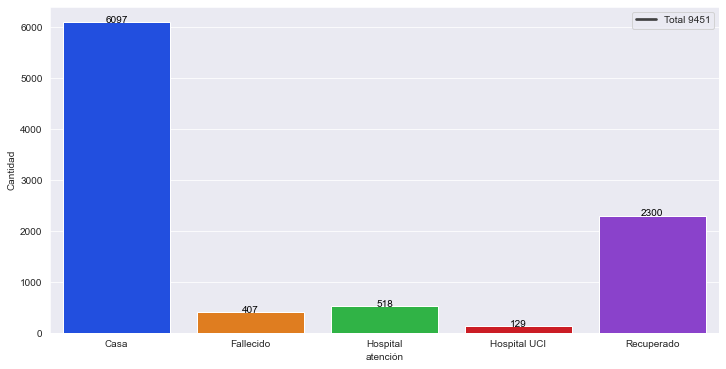

In [15]:
plt.figure(figsize=(12,6))
g = sns.barplot(x="atención", y="Cantidad", data=by_atention, palette="bright")
g.legend(["Total " +str(n_confirmed)])

for index, row in by_atention.iterrows():
    g.text(row.name,  row.Cantidad, row.Cantidad, ha='center',va="baseline", color="black")

#### Graphic by type of age distribution
Create a new column called Categoria to make groups of ages


In [16]:
bins = np.arange(0, 100, 10)
df['categoria'] = np.digitize(df.Edad, bins=bins)

Create a dataframe that has the information by group of ages of the confirmed, recover and deceased cases

In [17]:
df_confirmed = df.groupby('categoria').Edad.count().reset_index()

In [18]:
df_recovered = df[df["atención"] == "Recuperado"].groupby(['categoria']).Edad.count().reset_index()

In [19]:
df_deceased = df[df["atención"] == "Fallecido"].groupby(['categoria']).Edad.count().reset_index()

In [20]:
from functools import reduce
data_frames = [df_confirmed, df_recovered, df_deceased]
df_category = reduce(lambda  left,right: pd.merge(left,right,on=['categoria'],
                                            how='left'), data_frames)

In [21]:
df_category.rename(columns={"Edad_x":"Cantidad_Confirmados","Edad_y":"Cantidad_Recuperados",
                          "Edad":"Cantidad_Fallecidos"},inplace=True)

In [22]:
df_category

,categoria,Cantidad_Confirmados,Cantidad_Recuperados,Cantidad_Fallecidos
0,1,368,71,3
1,2,598,115,1
2,3,2031,503,9
3,4,2064,560,13
4,5,1561,387,34
5,6,1310,363,50
6,7,777,183,102
7,8,494,82,113
8,9,202,32,61
9,10,51,4,21


Barplots of the dataframe indicating the count of Confirmed, Recovered and Deceased cases by age category

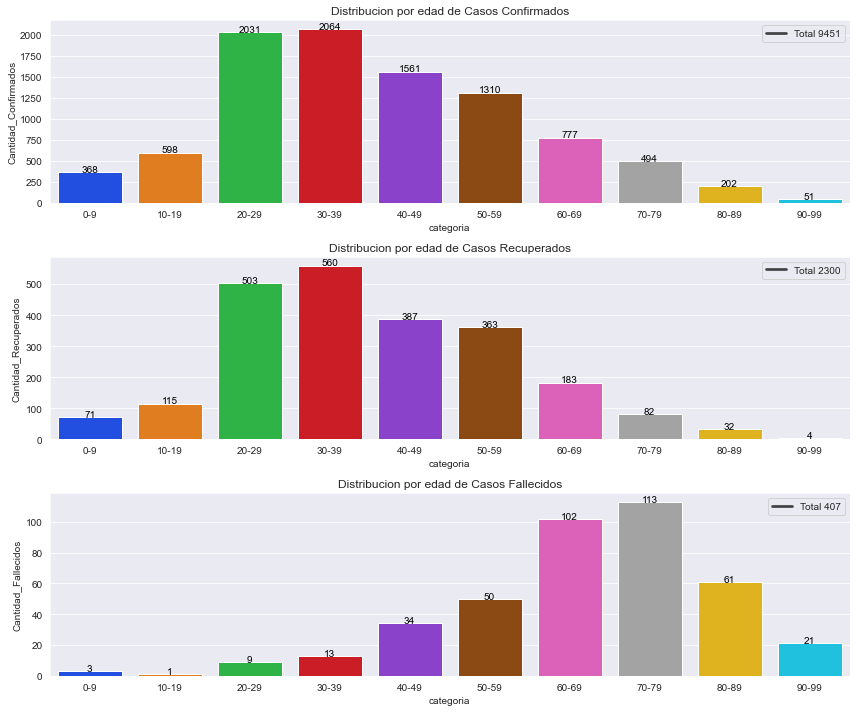

In [23]:
ticktext = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', "60-69", "70-79", "80-89", "90-99"]
n_interest = [n_confirmed, n_recovered, n_deceased]
titles = ["Cantidad_Confirmados", "Cantidad_Recuperados", "Cantidad_Fallecidos"]
i = 0

fig, axes = plt.subplots(nrows=3,ncols=1,figsize=(12,10))

for title in titles:
    g = sns.barplot(x="categoria", y=title, data=df_category, palette="bright", ax=axes[i])
    g.set(xticklabels=ticktext)
    g.set(title= "Distribucion por edad de Casos " + titles[i].split("_")[1])
    g.legend(["Total " +str(n_interest[i])])
    
    for index, row in df_category.iterrows():
        g.text(row.name, row[title], row[title], ha='center', color="black")
    i+=1 
    
plt.tight_layout()

#### Graphic by type of sex
Create a dataframe that has the information by sex of the confirmed, recover and deceased cases

In [24]:
df_S_confirmed = df.groupby('Sexo').Edad.count().reset_index()

In [25]:
df_S_recovered = df[df["atención"] == "Recuperado"].groupby(['Sexo']).Edad.count().reset_index()

In [26]:
df_S_deceased = df[df["atención"] == "Fallecido"].groupby(['Sexo']).Edad.count().reset_index()

In [27]:
data_frames = [df_S_confirmed, df_S_recovered, df_S_deceased]
df_sex = reduce(lambda  left,right: pd.merge(left,right,on=['Sexo'],
                                            how='inner'), data_frames)

In [28]:
df_sex.rename(columns={"Edad_x":"Cantidad_Confirmados","Edad_y":"Cantidad_Recuperados",
                          "Edad":"Cantidad_Fallecidos"},inplace=True)

df_sex

,Sexo,Cantidad_Confirmados,Cantidad_Recuperados,Cantidad_Fallecidos
0,F,4166,1166,157
1,M,5286,1133,250


Piecharts of the dataframe indicating the percentages of Confirmed, Recovered and Deceased cases by sex

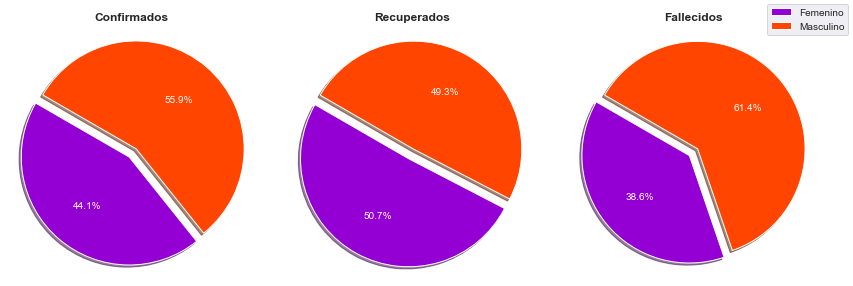

In [29]:
titles = ["Cantidad_Confirmados", "Cantidad_Recuperados", "Cantidad_Fallecidos"]
labels=["Femenino","Masculino"]
explode = (0.1, 0)
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
i=0

for title in titles:
    axes[i].pie(df_sex[title], labels=labels, autopct='%1.1f%%',
                shadow=True, colors=["darkviolet","orangered"],counterclock=True, startangle=150,
                explode=explode, textprops=dict(color="w"))
    axes[i].set_title(title.split("_")[1],fontweight='bold')
    axes[i].axis('equal')
    i+=1

fig.legend(labels, loc="upper right")
fig.tight_layout()

#### Graphic by type of virus transmission
Create a dataframe that has the information by type of virus transmission

In [30]:
df_type = df.groupby('Tipo')["Edad"].count().reset_index()
df_type.rename(columns={"Edad":"Cantidad"},inplace=True)
df_type

,Tipo,Cantidad
0,En estudio,5465
1,Importado,822
2,Relacionado,3169


Piechart of the dataframe indicating the percentages of type of transmission

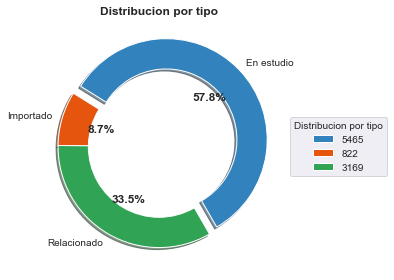

In [31]:
fig, ax = plt.subplots()
labels = list(df_type["Tipo"])
size = .3
explode = (0.1, 0, 0)

cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(3)*4)

wedges, texts, autotexts = ax.pie(df_type["Cantidad"], labels=labels, autopct='%1.1f%%', radius=1, 
       colors=outer_colors, wedgeprops=dict(width=size, edgecolor='w'), 
       explode=explode, shadow=True, startangle=300)

ax.legend(wedges, df_type["Cantidad"],
          title="Distribucion por tipo",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

ax.set_title("Distribucion por tipo",fontweight='bold')
plt.setp(autotexts, size=12, weight="bold")
fig.tight_layout()

#### Graphic by type of atention of the confirmed cases
Create a new column called Activo that is Activo if the person is not recovered or deceased

In [32]:
df["Activo"] = df["atención"].apply(lambda x: "Activo" if (x == "Casa") | (x == "Hospital" ) | (x == "Hospital UCI" ) else x)

Create a dataframe that has the information by active, recovered and deceased cases

In [33]:
df_Aten_confirmed = df.groupby('Activo')["Edad"].count().reset_index()
df_Aten_confirmed.rename(columns={"Edad":"Cantidad"},inplace = True)
df_Aten_confirmed

,Activo,Cantidad
0,Activo,6744
1,Fallecido,407
2,Recuperado,2300


Create a dataframe that has the information of active cases by the type of attention that are receiving

In [34]:
df_actives = df.groupby('atención').Edad.count().reset_index()
df_actives = df_actives[(df_actives["atención"] != "Fallecido") & (df_actives["atención"] != "Recuperado")].reset_index()
df_actives.rename(columns={"Edad":"Cantidad"}, inplace = True)
df_actives.drop(columns={"index"}, inplace=True)
df_actives

,atención,Cantidad
0,Casa,6097
1,Hospital,518
2,Hospital UCI,129


Piecharts of the dataframes indicating the percentages of confirmed cases by type of situation that they are and the attention that are receiving the confirmed cases 

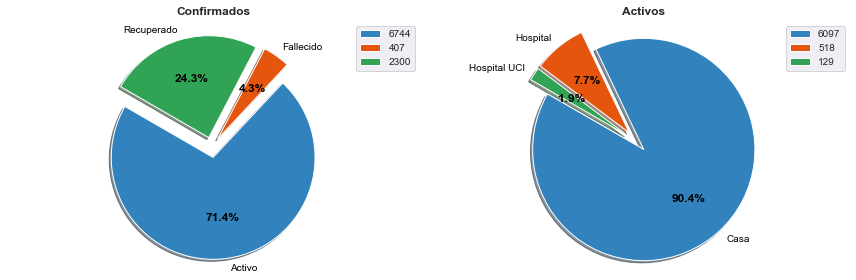

In [35]:
cmap = plt.get_cmap("tab20c")
colors = cmap(np.arange(3)*4)

explode = (0.1, 0.1, 0.1)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
i=0

wedges, texts, autotexts = axes[0].pie(df_Aten_confirmed["Cantidad"], labels=df_Aten_confirmed["Activo"], autopct='%1.1f%%',
            shadow=True, colors=colors,counterclock=True, startangle=150,
            explode=explode, textprops=dict(color="black"))
axes[0].set_title("Confirmados",fontweight='bold')
axes[0].legend(list(df_Aten_confirmed["Cantidad"]), loc="upper right")
axes[0].axis('equal')
plt.setp(autotexts, size=12, weight="bold")
   

wedges, texts, autotexts = axes[1].pie(df_actives["Cantidad"], labels=df_actives["atención"], autopct='%1.1f%%',
            shadow=True, colors=colors,counterclock=True, startangle=150,
            explode=explode, textprops=dict(color="black"))
axes[1].set_title("Activos",fontweight='bold')
axes[1].legend(list(df_actives["Cantidad"]), loc="upper right")
axes[1].axis('equal')
plt.setp(autotexts, size=12, weight="bold")

fig.tight_layout()

#### Graphic by deparments

Create a dataframe that has the information of total, active, recovered and deceased cases by deparments

In [36]:
df_deparments = df.groupby("Departamento o Distrito ").Edad.count().reset_index()
df_deparments.rename(columns={"Edad":"Total"}, inplace = True)

In [37]:
df_C_actives = df[(df["atención"] != "Recuperado") & (df["atención"] != "Fallecido") ].groupby(["Departamento o Distrito "]).Edad.count().reset_index()
df_C_actives.rename(columns={"Edad":"Cantidad_Activos"}, inplace = True)

In [38]:
df_C_recovered = df[df["atención"] == "Recuperado"].groupby(["Departamento o Distrito "]).Edad.count().reset_index()
df_C_recovered.rename(columns={"Edad":"Cantidad_Recuperados"}, inplace = True)

In [39]:
df_C_deceased = df[df["atención"] == "Fallecido"].groupby(["Departamento o Distrito "]).Edad.count().reset_index()
df_C_deceased.rename(columns={"Edad":"Cantidad_Fallecidos"}, inplace = True)

In [40]:
from functools import reduce
data_frames = [df_deparments, df_C_actives, df_C_recovered, df_C_deceased]
df_country = reduce(lambda  left,right: pd.merge(left,right,on=["Departamento o Distrito "],
                                            how='left'), data_frames).fillna(0)

In [41]:
df_country["text"] = df_country['Departamento o Distrito '] + "<br>" + \
"Casos Activos: " + df_country['Cantidad_Activos'].apply(str) + "<br>" + \
" Recuperados: " + df_country['Cantidad_Recuperados'].apply(str)  + "<br>" + \
" Fallecidos: " + df_country['Cantidad_Fallecidos'].apply(str)

In [42]:
df_country["Departamento o Distrito "] = df_country["Departamento o Distrito "].apply(lambda x: x.upper())

In [43]:
df_country.head()

,Departamento o Distrito,Total,Cantidad_Activos,Cantidad_Recuperados,Cantidad_Fallecidos,text
0,AMAZONAS,418,404.0,0.0,14.0,Amazonas<br>Casos Activos: 404.0<br> Recuperad...
1,ANTIOQUIA,460,232.0,222.0,6.0,Antioquia<br>Casos Activos: 232.0<br> Recupera...
2,ARCHIPIELAGO DE SAN ANDRES PROVIDENCIA Y SANTA...,6,2.0,4.0,0.0,Archipielago de San Andres Providencia y Santa...
3,ATLANTICO,760,656.0,71.0,33.0,Atlantico<br>Casos Activos: 656.0<br> Recupera...
4,BOLIVAR,435,267.0,130.0,38.0,Bolivar<br>Casos Activos: 267.0<br> Recuperado...


Geoplot of the dataframe indicating the total, active, recovered and deceased cases by departments 

In [ ]:
import plotly.io as pio
pio.renderers.default = "svg"

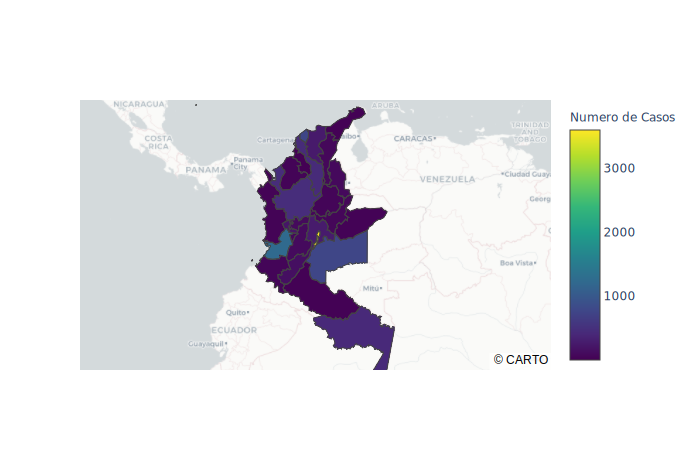

In [44]:
import plotly.graph_objects as go
import json
from urllib.request import urlopen
with urlopen('https://gist.githubusercontent.com/john-guerra/43c7656821069d00dcbc/raw/be6a6e239cd5b5b803c6e7c2ec405b793a9064dd/Colombia.geo.json') as response:
    counties = json.load(response)
locs = df_country["Departamento o Distrito "]



for loc in counties['features']:
    loc['id'] = loc['properties']['NOMBRE_DPT']
    
fig = go.Figure(go.Choroplethmapbox(
                    geojson=counties,
                    locations= locs,
                    text= df_country["text"],
                    z= df_country["Total"],
                    colorscale='viridis',
                    colorbar_title="Numero de Casos"))
fig.update_layout(mapbox_style="carto-positron",
                        mapbox_zoom=3.5,
                        mapbox_center = {"lat": 4.570868, "lon": -74.2973328})





#### Evolution of the virus
Create a data frame that has de information of the virus spread counting since the first day that someone had the virus 

In [45]:
df["Fecha diagnostico"] = pd.to_datetime(df["Fecha diagnostico"])
df["Fecha de muerte"] = pd.to_datetime(df['Fecha de muerte'], errors='coerce')
df["Fecha recuperado"] = pd.to_datetime(df['Fecha recuperado'], errors='coerce')

Which day was the first report of the virus ?

In [46]:
initialDate = df["Fecha diagnostico"].min()
initialDate

Timestamp('2020-03-06 00:00:00')

In [47]:
df['Numero de Dia'] = (df['Fecha diagnostico'] - initialDate).dt.days
df['Dia Recuperado'] = (df['Fecha recuperado'] - initialDate).dt.days
df['Dia Muerte'] = (df['Fecha de muerte'] - initialDate).dt.days

In [48]:
df_Acum_casos = df.groupby("Numero de Dia").Edad.count().reset_index()
df_Acum_casos.rename(columns={"Edad":"Casos"}, inplace = True)

In [49]:
df_Acum_recovered = df[df["atención"] == "Recuperado"].groupby(["Dia Recuperado"]).Edad.count().reset_index()
df_Acum_recovered.rename(columns={"Edad":"Recuperados"}, inplace = True)

In [50]:
df_Acum_deceased = df[df["atención"] == "Fallecido"].groupby(["Dia Muerte"]).Edad.count().reset_index()
df_Acum_deceased.rename(columns={"Edad":"Fallecidos"}, inplace = True)

In [51]:
df_days = pd.merge(df_Acum_casos, df_Acum_recovered, how="left", left_on= ["Numero de Dia"], right_on=["Dia Recuperado"])
df_days = pd.merge(df_days, df_Acum_deceased, how="left", left_on= ["Numero de Dia"], right_on=["Dia Muerte"]).fillna(0)
df_days.drop(["Dia Recuperado","Dia Muerte"], axis=1, inplace = True)

In [52]:
df_acum = df_days.copy()

In [53]:
df_acum["Casos"] = df_acum["Casos"].cumsum(axis = 0)
df_acum["Recuperados"] = df_acum["Recuperados"].cumsum(axis = 0)
df_acum["Fallecidos"] = df_acum["Fallecidos"].cumsum(axis = 0)

In [54]:
df_acum.tail()

,Numero de Dia,Casos,Recuperados,Fallecidos
55,58,7664,1948.0,374.0
56,59,7971,1979.0,388.0
57,60,8613,2162.0,396.0
58,61,8959,2232.0,404.0
59,62,9456,2300.0,407.0


Plot of the log number of cases of the behiave of the virus counting since the first day that someone had the it. 

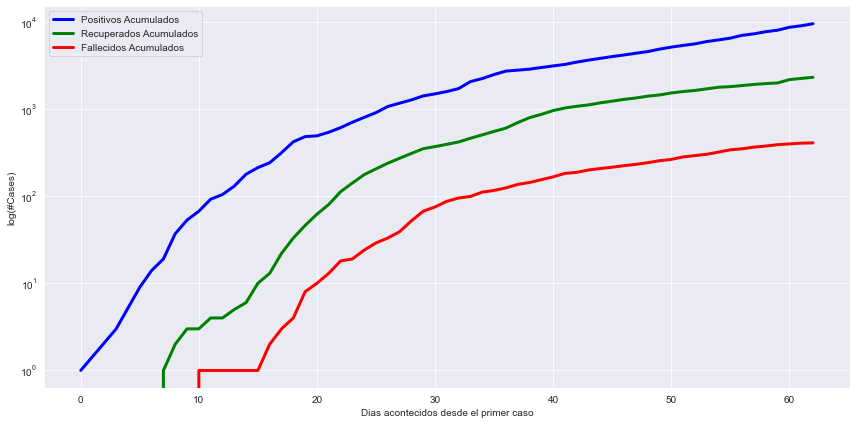

In [55]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1, 1, 1)
ax.set_yscale('log')

plt.plot(df_acum['Numero de Dia'], df_acum['Casos'], label='Positivos Acumulados', color="blue",lw=3)
plt.plot(df_acum['Numero de Dia'], df_acum['Recuperados'], label='Recuperados Acumulados', color="green", lw=3)
plt.plot(df_acum['Numero de Dia'], df_acum['Fallecidos'], label='Fallecidos Acumulados', color="red", lw=3)

ax.legend()
plt.xlabel('Dias acontecidos desde el primer caso')
plt.ylabel('log(#Cases)')
plt.tight_layout()

Interactive spread plot of the days since the first day that someone had the virus versus the Number of Cases

In [56]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
init_notebook_mode(connected=True)
cf.go_offline()

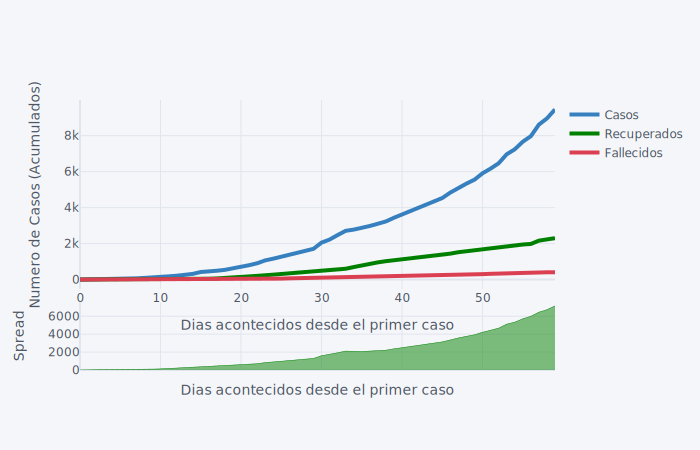

In [60]:
df_acum[['Casos','Recuperados',"Fallecidos"]].\
            iplot(kind='spread',colors=["blue", "green", "red"], xTitle='Dias acontecidos desde el primer caso',
                 yTitle="Numero de Casos (Acumulados)",width=4)


Dataframe of the daily reported cases

In [58]:
df_days.tail()

,Numero de Dia,Casos,Recuperados,Fallecidos
55,58,423,44.0,10.0
56,59,307,31.0,14.0
57,60,642,183.0,8.0
58,61,346,70.0,8.0
59,62,497,68.0,3.0


Barplot of the daily reported cases

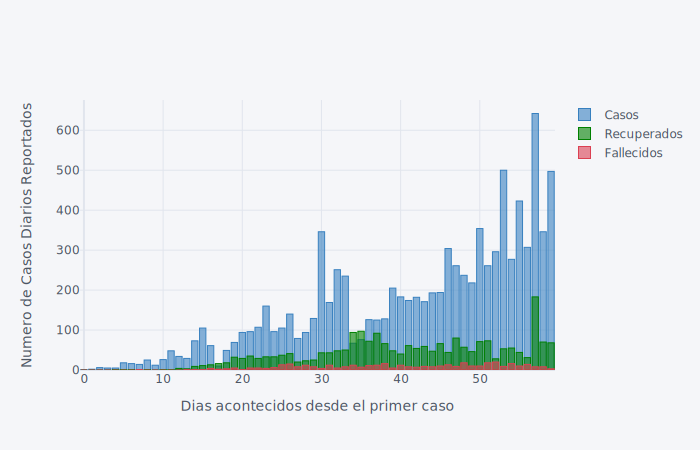

In [61]:
df_days[['Casos','Recuperados',"Fallecidos"]].\
            iplot(kind='bar',colors=["blue", "green", "red"], xTitle='Dias acontecidos desde el primer caso',
                 yTitle="Numero de Casos Diarios Reportados",barmode="overlay")
